In [10]:
from sklearn import datasets
from sklearn import svm
import scipy
import numpy as np
import matplotlib 
import pandas as pd
import csv

In [11]:
iris = datasets.load_iris()
digits = datasets.load_digits()
# print(digits.data)  
# print(iris.data)
print("scipy: {} ".format(scipy.__version__))
print("numpy: {} ".format(numpy.__version__))

scipy: 1.0.0 
numpy: 1.13.3 


In [14]:
clf = svm.SVC(gamma=0.001, C=100.)
filename = "/Users/fengxu/AI/Data/pima-indians-diabetes.data.txt"

(768, 9)


In [15]:
#Load CSV Files with the Python Standard Library
raw_data = open(filename, "rt", encoding="utf-8") #encoding is "ascii" and "utf8"
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = numpy.array(x).astype('float')
print(data.shape)

(768, 9)


In [18]:
#Load CSV Files with NumPy
from numpy import loadtxt
raw_data = open(filename,  'rb' )
data = loadtxt(raw_data, delimiter=",")
print(data.shape)

(768, 9)


(768, 9)
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895

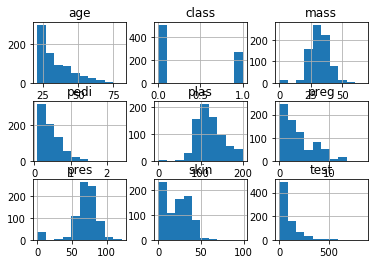

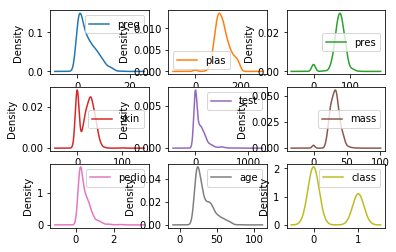

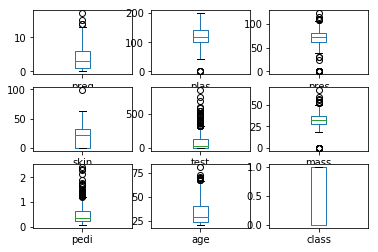

In [41]:
#Load CSV Files with Pandas
from pandas import read_csv
names=["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"] 
data = read_csv(filename, names=names)
print(data.shape)

#peek data
peek = data.head(10)
print(peek)

#data type
types = data.dtypes
print(types)

#set display options
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)

#Statistics
description = data.describe()
print(description)

#group by
class_counts = data.groupby(by='class').size()
print(class_counts)

#Correlations Between Attributes
#The most common method for calculating correlation is Pearson’s Correlation Coeffcient
#A correlation of -1 or 1 shows a full negative or positive correlation respectively. 
#Whereas a value of 0 shows no correlation at all
#Some machine learning algorithms like linear and logistic regression can suffer poor performance 
#if there are highly correlated attributes in your dataset
correlations = data.corr(method='pearson')
print(correlations)


#Skew of Univariate Distributions
#Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed 
#in one direction or another. Many machine learning algorithms assume a Gaussian distribution. 
#Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew
#and later improve the accuracy of your models
skew = data.skew()
#The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
print(skew)


from matplotlib import pyplot
#Histograms
#Histograms group data into bins and provide you a count of the number of observations in each bin
data.hist()
pyplot.show()

#Density Plots
#The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False) 
pyplot.show()

#Box and Whisker Plots
#Boxplots summarize the distribution of each attribute, 
#drawing a line for the median (middle value) and a box around the 25th and 75th percentiles 
#(the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the 
#whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) 
pyplot.show()

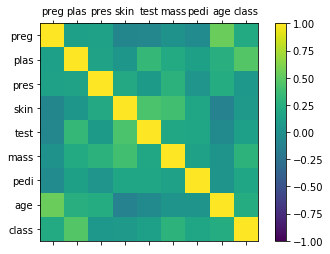

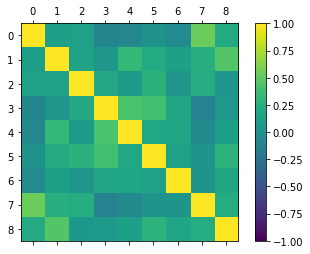

In [43]:
#Correlation Matrix Plot
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

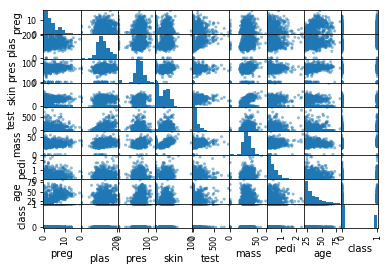

In [49]:
#Scatter Plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data)
pyplot.show()

In [53]:
#Rescale Data
#this is referred to as normalization and attributes are often rescaled into the range between 0 and 1
#This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent
#It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])



[[ 0.353  0.744  0.59   0.354  0.     0.501  0.234  0.483]
 [ 0.059  0.427  0.541  0.293  0.     0.396  0.117  0.167]
 [ 0.471  0.92   0.525  0.     0.     0.347  0.254  0.183]
 [ 0.059  0.447  0.541  0.232  0.111  0.419  0.038  0.   ]
 [ 0.     0.688  0.328  0.354  0.199  0.642  0.944  0.2  ]]


In [54]:
#Standardize Data
#Standardization is a useful technique to transform attributes with a Gaussian distribution and di↵ering
#means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [55]:
#Normalize Data
#This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of 
#varying scales when using algorithms that weight input values such as neural networks and algorithms 
#that use distance measures such as k-Nearest Neighbors
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])



[[ 0.034  0.828  0.403  0.196  0.     0.188  0.004  0.28 ]
 [ 0.008  0.716  0.556  0.244  0.     0.224  0.003  0.261]
 [ 0.04   0.924  0.323  0.     0.     0.118  0.003  0.162]
 [ 0.007  0.588  0.436  0.152  0.622  0.186  0.001  0.139]
 [ 0.     0.596  0.174  0.152  0.731  0.188  0.01   0.144]]


In [56]:
#Binarize Data
#All values above the threshold are marked 1 and all equal to or below are marked as 0
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])


[[ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]]


In [57]:
#Feature Selection

#Univariate Selection
#Statistical tests can be used to select those features that have the strongest relationship with the output variable
#The scikit-learn library provides the SelectKBest class2 that can be used with a suite of di↵erent statistical tests to select a specific number of features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])


[  111.52   1411.887    17.605    53.108  2175.565   127.669     5.393
   181.304]
[[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]
 [ 183.     0.    23.3   32. ]
 [  89.    94.    28.1   21. ]
 [ 137.   168.    43.1   33. ]]


In [62]:
#Recursive Feature Elimination
#The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on 
#those attributes that remain. It uses the model accuracy to identify which
#attributes (and combination of attributes) contribute the most to predicting the target attribute.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#The example below uses RFE with the logistic regression algorithm to select the top 3 features. 
#The choice of algorithm does not matter too much as long as it is skillful and consistent.
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

#get the selected features
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]
[[  6.     33.6     0.627]
 [  1.     26.6     0.351]
 [  8.     23.3     0.672]
 [  1.     28.1     0.167]
 [  0.     43.1     2.288]]


In [64]:
#Principal Component Analysis
#Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. 
#Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal components in the transformed result
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: {}".format(fit.explained_variance_ratio_)) 
print(fit.components_)
#get the selected features
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])


Explained Variance: [ 0.889  0.062  0.026]
[[ -2.022e-03   9.781e-02   1.609e-02   6.076e-02   9.931e-01   1.401e-02
    5.372e-04  -3.565e-03]
 [ -2.265e-02  -9.722e-01  -1.419e-01   5.786e-02   9.463e-02  -4.697e-02
   -8.168e-04  -1.402e-01]
 [ -2.246e-02   1.434e-01  -9.225e-01  -3.070e-01   2.098e-02  -1.324e-01
   -6.400e-04  -1.255e-01]]
[[ -7.571e+01  -3.595e+01  -7.261e+00]
 [ -8.236e+01   2.891e+01  -5.497e+00]
 [ -7.463e+01  -6.791e+01   1.946e+01]
 [  1.108e+01   3.490e+01  -5.302e-02]
 [  8.974e+01  -2.747e+00   2.521e+01]]


In [67]:
#Feature Importance
# feature extraction
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.117  0.234  0.091  0.077  0.079  0.139  0.114  0.149]


In [72]:
#Split into Train and Test Sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
test_size = 0.33
seed = 4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
    random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: {}".format(result*100.0))

Accuracy: 80.31496062992126


In [75]:
#K-fold Cross Validation
#It works by splitting the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold
#The algorithm is trained on k - 1 folds with one held back and tested on the held back fold. This is repeated 
#so that each fold of the dataset is given a chance to be the held back test set. After running cross validation 
#you end up with k di↵erent performance scores that you can summarize using a mean and a standard deviation.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: {} ({})".format(results.mean()*100.0, results.std()*100.0))



Accuracy: 76.95146958304852 (4.841051924567195)


In [76]:
#Leave One Out Cross Validation
#You can configure cross validation so that the size of the fold is 1 (k is set to the number of observations in your dataset). 
#This variation of cross validation is called leave-one-out cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: {} ({})".format(results.mean()*100.0, results.std()*100.0))


Accuracy: 76.82291666666666 (42.1963403803346)


In [77]:
#Repeated Random Test-Train Splits
#Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, 
#but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: {} ({})".format(results.mean()*100.0, results.std()*100.0))



Accuracy: 76.5748031496063 (1.6633567066360335)


In [89]:
#Performance Metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
#Classification Accuracy
#Classification accuracy is the number of correct predictions made as a ratio of all predictions made. 
#This is the most common evaluation metric for classification problems, it is also the most misused.
scoring ='accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("Accuracy: {} ({})".format(results.mean(), results.std()))

#Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities 
#of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of 
#confidence for a prediction by an algorithm.
#Smaller logloss is better with 0 representing a perfect logloss
scoring ='neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("Logloss: {} ({})".format(results.mean(), results.std()))

#Area Under ROC Curve
#Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
#An area of 1.0 represents a model that made all predictions perfectly. 
#An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity.
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#You can see the AUC is relatively close to 1 and greater than 0.5
print("AUC: {} ({})".format(results.mean(), results.std()))


#Mean Absolute Error
#The Mean Absolute Error (or MAE) is the sum of the absolute di↵erences between predictions and actual values. 
#It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction
#A value of 0 indicates no error or perfect predictions.
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("MAE: {} ({})".format(results.mean(), results.std()))

#Mean Squared Error
#The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. 
#Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation.
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("MSE: {} ({})".format(results.mean(), results.std()))


#R2 Metric
#The R2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. 
#In statistical literature this measure is called the coecient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively.
scoring =  'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R2: {} ({})".format(results.mean(), results.std()))


Accuracy: 0.7695146958304853 (0.04841051924567195)
Logloss: -0.49250779585870524 (0.04705867683481091)
AUC: 0.823716379293716 (0.040723558409611754)
MAE: -0.23048530416951468 (0.04841051924567195)
MSE: -0.23048530416951468 (0.04841051924567195)
R2: -0.03364706061827194 (0.14872229521524277)


In [83]:
#Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
    random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

#Classification Report
report = classification_report(Y_test, predicted)
print(report)

[[141  21]
 [ 41  51]]
             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254

